## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [2]:
solar_data = pd.read_csv("data/solarpower.csv")
for i in range(solar_data.shape[0]):
    if solar_data.loc[i, "cum_power"] == -1:
        solar_data.loc[i, "cum_power"] = (
            solar_data.loc[i - 1, "cum_power"] + solar_data.loc[i + 1, "cum_power"]
        ) / 2
solar_data.isnull().sum()

date         0
cum_power    0
dtype: int64

-----

Критерии оценки:

Студенту выставляется 1 балл за задание, если:
* В предыдущей ящейке указан код, реализующий замену пропущенных значений (обозначенных в столбец cum_power как -1) на среднее арифметическое между двумя соседними элементами
* Он заполнил пропуски с использованием указанной в задании формулы, но его способ заполнения является низкопроизводительным (скорость выполнения кода в 10-15 раз ниже, чем указанная в эталлонном решении), либо он заполнил пропущенные значения вручную.

Студенту выставляется 2 балла за задание, если:
* В предыдущей ящейке указан код, реализующий замену пропущенных значений (обозначенных в столбец cum_power как -1) на среднее арифметическое между двумя соседними элементами
* Заполнение пропусков автоматизировано и скорость работы алгоритма сопоставима с эталонным решением

-----

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [3]:
#чему равно среднее арифметическое
solar_data['cum_power'].mean()

23848.246987951807

In [4]:
#рассчет ежедневного прироста производства СЭ
solar_data['day_power'] = solar_data['cum_power'].diff()
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data['year_month'] = solar_data['date'].dt.to_period('M')
grouped = solar_data.groupby(['year_month']).sum()
grouped.head()

/tmp/ipykernel_5385/1328914565.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = solar_data.groupby(['year_month']).sum()


,cum_power,day_power
year_month,,
2017-01,624746.0,97.0
2017-02,567197.0,104.0
2017-03,633782.0,334.0
2017-04,626551.0,489.0
2017-05,663651.0,589.0


----

In [6]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        664 non-null    datetime64[ns]
 1   cum_power   664 non-null    float64       
 2   day_power   663 non-null    float64       
 3   year_month  664 non-null    period[M]     
dtypes: datetime64[ns](1), float64(2), period[M](1)
memory usage: 20.9 KB


In [9]:
#чему равно среднее арифметическое
solar_data[solar_data['year_month']=='2017-03']['day_power'].mean()

10.774193548387096

Критерии оценки:

Студенту выставляется 1 балл за задание, если:
* Он верно расчитал ежедневный прирост производства солнечной энерегии как разницу между двумя соседними наблюдениями в столбце cum_power
* Он не расчитал или расчитал ошибочно ежемесячную выработку солнечной энерегии

Студенту выставляется 2 балла за задание, если:

* Он верно расчитал ежедневный прирост производства солнечной энерегии как разницу между двумя соседними наблюдениями в столбце cum_power
* Он верно расчитал ежемесячную выработку солнечной энергии, сгруппировав данные по годам и месяцам одновременно и вычислив сумму по столбцам

-----

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

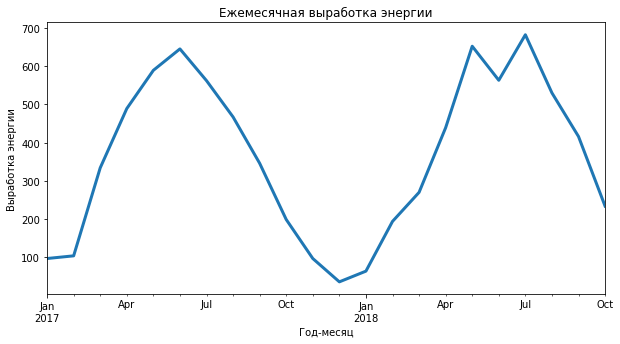

In [4]:
grouped['day_power'].plot(
    kind='line',
    lw=3, 
    title='Ежемесячная выработка энергии',
    xlabel='Год-месяц',
    ylabel='Выработка энергии',
    figsize=(10, 5)
);

----

Критерии оценки:

Студенту выставляется 1 балл, если:

* Он построил **линейный** график ежемесячной выработки солнечной энерегии (данные полученные в задании 2), а также подписал его оси и сам график
* Он привел анализ полученного графика, но приведенные выводы не соответствуют, либо частично соответствуют построенному графику

Студенты выставляется 2 балла, если:

* Он построил **линейный** график ежемесячной выработки солнечной энерегии (данные полученные в задании 2), а также подписал его оси и сам график
* Он привел анализ полученного графика, приведенные выводы соответствуют представленному графику

Пример анализа:

Из построенного графика отчетливо наблюдается зависимость выработки солнечной энергии от сезона: наибольшая производительность солнечных батарей наблюдается в летние месяцы (июнь-июль-август), наименьшая - в зимние месяцы (декабрь-январь). Жаркие летние месяцыы характеризуются наибольшой солнечной активностью, а следственно и наибольшей выработкой электроэнергии

-----

После того, как вы выполнили практическое задание, отправьте ваш ноутбук на проверку ментору, чтобы получить баллы.